# MNIST Classification - Five Layer Convolutional NN

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
import math
tf.set_random_seed(0)

In [2]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# learning rate
lr = tf.placeholder(tf.float32)

pkeep = tf.placeholder(tf.float32)

# weights
W1 = tf.Variable(tf.truncated_normal([6, 6, 1, 6], stddev=0.1)) # 6x6 patch, 1 input channel, 6 output channels
W2 = tf.Variable(tf.truncated_normal([5,5,6,12], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([4,4,12,24], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([7*7*24, 200], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))

# biases
b1 = tf.Variable(tf.ones([6])/10)
b2 = tf.Variable(tf.ones([12])/10)
b3 = tf.Variable(tf.ones([24])/10)
b4 = tf.Variable(tf.ones([200])/10)
b5 = tf.Variable(tf.ones([10])/10)

In [4]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [5]:
# The model
stride = 1
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + b1)
stride = 2
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + b2)
stride = 2
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + b3)

YY = tf.reshape(Y3, shape=[-1, 7 * 7 * 24])

Y4 = tf.nn.relu(tf.matmul(YY, W4) + b4)

Y4d = tf.nn.dropout(Y4, pkeep)

Z = tf.matmul(Y4d, W5) + b5
Y = tf.nn.softmax(Z)

In [6]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [7]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [8]:
# to keep track of max accuracy
max_accuracy = 0.0

In [9]:
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [11]:
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    
    # learning rate decay
    max_learning_rate = 0.003
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, pkeep: 1.0})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, pkeep: 1.0})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, lr: learning_rate, pkeep: 0.75})

In [12]:
# run this thang
for i in range(10000+1): 
    training_step(i)

0: accuracy:0.15 loss: 238.77359
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.0967 test loss: 244.7639
10: accuracy:0.7 loss: 125.60567
20: accuracy:0.85 loss: 50.479923
30: accuracy:0.83 loss: 50.455795
40: accuracy:0.93 loss: 20.905094
50: accuracy:0.91 loss: 31.622952
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9223 test loss: 26.909977
60: accuracy:0.94 loss: 18.329115
70: accuracy:0.94 loss: 26.732817
80: accuracy:0.95 loss: 16.358953
90: accuracy:0.92 loss: 21.381582
100: accuracy:0.99 loss: 5.4675417
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9501 test loss: 16.182898
110: accuracy:0.94 loss: 14.585807
120: accuracy:0.94 loss: 27.627373
130: accuracy:0.98 loss: 11.600432
140: accuracy:0.97 loss: 9.944057
150: accuracy:0.97 loss: 9.722267
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9543 test loss: 14.795777
160: accuracy:0.97 loss: 9.5699005
170: accuracy:0.93 loss: 17.337395
180: accuracy:0.95 loss: 19.717049
190: accuracy:0.95 loss: 18.917372
200: accuracy:0.96 loss: 30.71

1660: accuracy:0.99 loss: 1.6987387
1670: accuracy:1.0 loss: 0.43951395
1680: accuracy:1.0 loss: 0.49665332
1690: accuracy:1.0 loss: 0.9196642
1700: accuracy:0.99 loss: 4.1726375
1700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.988 test loss: 3.674268
1710: accuracy:0.99 loss: 2.4511082
1720: accuracy:1.0 loss: 0.59980744
1730: accuracy:1.0 loss: 0.8215569
1740: accuracy:0.97 loss: 8.43955
1750: accuracy:1.0 loss: 0.37028298
1750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.988 test loss: 3.7543714
1760: accuracy:1.0 loss: 1.7632465
1770: accuracy:0.98 loss: 7.7496142
1780: accuracy:0.99 loss: 2.75527
1790: accuracy:0.98 loss: 6.0558443
1800: accuracy:1.0 loss: 0.59106314
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9891 test loss: 3.4819562
1810: accuracy:0.99 loss: 2.7768304
1820: accuracy:1.0 loss: 0.5663975
1830: accuracy:1.0 loss: 0.88256055
1840: accuracy:1.0 loss: 1.3502073
1850: accuracy:1.0 loss: 1.105809
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9888 test loss: 3.2555733
18

3310: accuracy:1.0 loss: 0.14230447
3320: accuracy:1.0 loss: 0.48460555
3330: accuracy:1.0 loss: 0.30536625
3340: accuracy:1.0 loss: 0.9048746
3350: accuracy:1.0 loss: 0.48740566
3350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9903 test loss: 3.2662742
3360: accuracy:1.0 loss: 0.017874787
3370: accuracy:1.0 loss: 0.13240796
3380: accuracy:0.99 loss: 5.656585
3390: accuracy:1.0 loss: 0.17534597
3400: accuracy:1.0 loss: 0.4254614
3400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9906 test loss: 3.3829622
3410: accuracy:1.0 loss: 0.4766677
3420: accuracy:1.0 loss: 0.007717909
3430: accuracy:1.0 loss: 0.37339312
3440: accuracy:1.0 loss: 0.086369105
3450: accuracy:1.0 loss: 0.046528596
3450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9909 test loss: 3.084179
3460: accuracy:1.0 loss: 0.42616367
3470: accuracy:1.0 loss: 0.013646419
3480: accuracy:0.99 loss: 1.0796186
3490: accuracy:1.0 loss: 0.5180898
3500: accuracy:1.0 loss: 0.3461378
3500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9896 test loss: 

4940: accuracy:1.0 loss: 0.036461167
4950: accuracy:1.0 loss: 0.15821141
4950: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9907 test loss: 3.0231812
4960: accuracy:1.0 loss: 0.5770656
4970: accuracy:1.0 loss: 0.008107001
4980: accuracy:1.0 loss: 0.2900863
4990: accuracy:1.0 loss: 0.09616603
5000: accuracy:1.0 loss: 0.12963101
5000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9913 test loss: 2.9923065
5010: accuracy:1.0 loss: 0.32070723
5020: accuracy:0.99 loss: 3.9012284
5030: accuracy:1.0 loss: 0.018461749
5040: accuracy:1.0 loss: 1.2217423
5050: accuracy:1.0 loss: 0.09117163
5050: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9916 test loss: 3.0308294
5060: accuracy:1.0 loss: 0.025099272
5070: accuracy:1.0 loss: 0.25011533
5080: accuracy:1.0 loss: 0.063528374
5090: accuracy:1.0 loss: 0.44396502
5100: accuracy:1.0 loss: 0.3781354
5100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9912 test loss: 3.0584068
5110: accuracy:1.0 loss: 0.014836427
5120: accuracy:1.0 loss: 0.06330271
5130: accuracy:1.0 los

6550: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9918 test loss: 3.3020344
6560: accuracy:1.0 loss: 0.02991712
6570: accuracy:1.0 loss: 0.012282131
6580: accuracy:1.0 loss: 0.017880976
6590: accuracy:1.0 loss: 0.0028892625
6600: accuracy:1.0 loss: 0.03559489
6600: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.991 test loss: 3.3742712
6610: accuracy:1.0 loss: 0.009890134
6620: accuracy:1.0 loss: 0.017423084
6630: accuracy:1.0 loss: 0.29944998
6640: accuracy:1.0 loss: 0.07348448
6650: accuracy:1.0 loss: 0.0073507987
6650: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9918 test loss: 3.2375886
6660: accuracy:1.0 loss: 0.038327858
6670: accuracy:1.0 loss: 0.056833506
6680: accuracy:1.0 loss: 0.039004847
6690: accuracy:1.0 loss: 0.102618694
6700: accuracy:1.0 loss: 0.11162187
6700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9914 test loss: 3.322955
6710: accuracy:1.0 loss: 0.014075957
6720: accuracy:1.0 loss: 0.02037776
6730: accuracy:1.0 loss: 0.017614076
6740: accuracy:1.0 loss: 0.058101695
6750: accur

8150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9911 test loss: 3.5921772
8160: accuracy:1.0 loss: 0.015788931
8170: accuracy:1.0 loss: 0.052419003
8180: accuracy:1.0 loss: 0.092665255
8190: accuracy:1.0 loss: 0.004067182
8200: accuracy:1.0 loss: 0.0074644983
8200: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9908 test loss: 3.613589
8210: accuracy:1.0 loss: 0.0030011819
8220: accuracy:1.0 loss: 0.0015478991
8230: accuracy:1.0 loss: 0.017272182
8240: accuracy:1.0 loss: 0.009370593
8250: accuracy:1.0 loss: 0.012833165
8250: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9916 test loss: 3.5602133
8260: accuracy:1.0 loss: 0.054326903
8270: accuracy:1.0 loss: 0.00582095
8280: accuracy:1.0 loss: 0.23154342
8290: accuracy:1.0 loss: 0.012395678
8300: accuracy:1.0 loss: 0.003224313
8300: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9911 test loss: 3.7732024
8310: accuracy:1.0 loss: 0.004893547
8320: accuracy:1.0 loss: 0.041940287
8330: accuracy:1.0 loss: 0.09824388
8340: accuracy:1.0 loss: 0.09339529
8350: a

9750: accuracy:1.0 loss: 0.017238991
9750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.991 test loss: 3.8185806
9760: accuracy:1.0 loss: 0.004372403
9770: accuracy:1.0 loss: 0.031712607
9780: accuracy:1.0 loss: 0.10786649
9790: accuracy:1.0 loss: 0.3649
9800: accuracy:1.0 loss: 0.08451659
9800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9908 test loss: 3.919573
9810: accuracy:1.0 loss: 0.072480306
9820: accuracy:1.0 loss: 0.00022588638
9830: accuracy:1.0 loss: 0.0057929372
9840: accuracy:1.0 loss: 0.046569902
9850: accuracy:1.0 loss: 0.008937056
9850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9908 test loss: 3.8335047
9860: accuracy:1.0 loss: 0.018077599
9870: accuracy:1.0 loss: 0.009456718
9880: accuracy:1.0 loss: 0.034768146
9890: accuracy:1.0 loss: 0.008537415
9900: accuracy:1.0 loss: 0.00017690175
9900: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9913 test loss: 3.7987
9910: accuracy:1.0 loss: 0.0061125467
9920: accuracy:1.0 loss: 0.015027115
9930: accuracy:1.0 loss: 0.021677472
9940: accur

In [13]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.9919


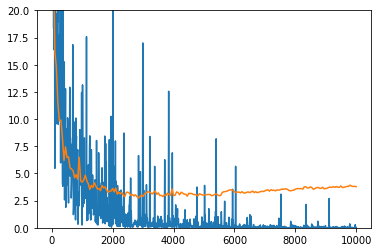

In [17]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
plt.ylim(top=20, bottom=0)
plt.show()

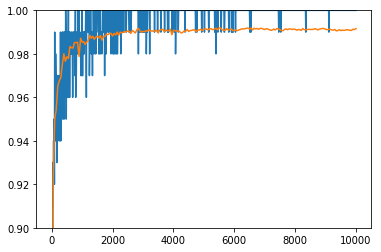

In [16]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
plt.ylim(top = 1, bottom=.9)
plt.show()